# Euler’s method

## Shark-Tuna model

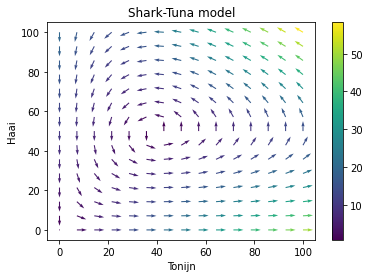

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
T,S = np.meshgrid(np.linspace(0,100,15),np.linspace(0,100,15))

u = 0.5*T - 0.01*S*T
v = 0.005*S*T - 0.2*S
M = np.sqrt(u**2 + v**2)
M[ M == 0] = 1 #vermijden dat er door 0 gedeeld wordt
u /= M
v /= M
plt.quiver(T,S,u,v,M)
plt.title('Shark-Tuna model')
plt.xlabel('Tonijn')
plt.ylabel('Haai')
plt.colorbar()
plt.show()

Een mogelijk traject is een misvormde cirkel, dit kan aangetoond worden met de methode van Euler:

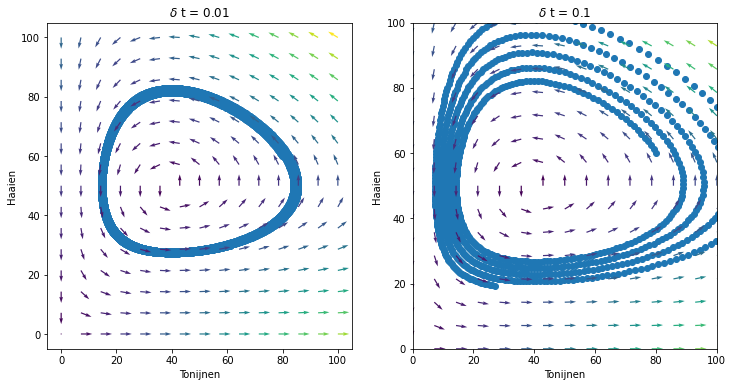

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def verandering(T,S):
    u = 0.5*T - 0.01*S*T
    v = 0.005*S*T - 0.2*S
    return [u,v]

def euler(stapgrootte,periode):
    
    #initiële condities
    T = 80
    S = 60
    
    x = []
    y = []
    for i in range(0,periode):
        x.append(T)
        y.append(S)
        T += stapgrootte*verandering(x[-1],y[-1])[0]
        S += stapgrootte*verandering(x[-1],y[-1])[1]
    return x,y

A,B = np.meshgrid(np.linspace(0,100,15),np.linspace(0,100,15))

u = 0.5*A - 0.01*B*A
v = 0.005*B*A - 0.2*B
M = np.sqrt(u**2 + v**2)
M[ M == 0] = 1 #vermijden dat er door 0 gedeeld wordt
u /= M
v /= M

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))

#subplot 1
x,y = euler(0.01,10000)
ax1.scatter(x,y)
plt.xlim(0, 100)
plt.ylim(0, 100)

ax1.quiver(A,B,u,v,M)
ax1.title.set_text('$\delta$ t = 0.01')

#subplot 2
x,y = euler(0.1,1000)
ax2.scatter(x,y)
plt.xlim(0, 100)
plt.ylim(0, 100)
ax2.quiver(A,B,u,v,M)
ax2.title.set_text('$\delta$ t = 0.1')

ax1.set_xlabel('Tonijnen')
ax1.set_ylabel('Haaien')

ax2.set_xlabel('Tonijnen')
ax2.set_ylabel('Haaien')

plt.show()

Zoals u ziet is over de gekozen tijdsperiode 0.01 als tijdsinterval geschikt om een stabiele 'cirkel' te vormen. Echter als het tijdsinterval groter wordt gekozen wijkt het traject af van de werkelijke baan door te weinig nauwkeurigheid (het 'overshooten/ondershooten' als het ware van het werkelijk traject), dit blijkt uit experimenteren al te gebeuren bij 0.02 en is zeer duidelijk zichtbaar bij 0.1 (zie figuur). De haai en tonijn populatie in functie van de tijd wordt nu weergeven over een gekozen tijdsperiode van 60 jaar (dit komt dan overeen met figuur 1.2):

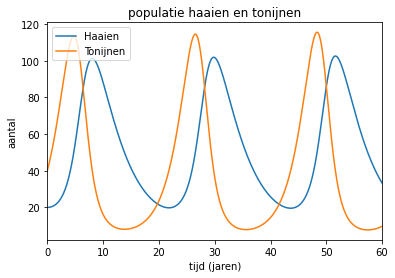

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def verandering(T,S):
    u = 0.5*T - 0.01*S*T
    v = 0.005*S*T - 0.2*S
    return [u,v]
x = []
y = []
tijd = []

T = 40
S = 20
stapgrootte = 0.01
bereik = 6000
for i in range(0,bereik):
    x.append(T)
    y.append(S)
    T += stapgrootte*verandering(x[-1],y[-1])[0]
    S += stapgrootte*verandering(x[-1],y[-1])[1]
    tijd.append(stapgrootte*i)
Haaien = plt.plot(tijd,y,label='Haaien')
Tonijnen = plt.plot(tijd,x,label='Tonijnen')
plt.xlim(0, stapgrootte*bereik)
plt.legend()
plt.title('populatie haaien en tonijnen')
plt.xlabel('tijd')
plt.ylabel('aantal')
plt.show()


Door eenzelfde begincondities te nemen als in figuur 1.2 (40 tonijnen en 20 haaien) komen we een grafiek uit die exact lijkt op figuur 1.2.

## De wrijvingsloze veer

De wrijvingloze veer wordt beschreven door het volgend dynamisch systeem:
X′ = V en V′ =−kX.
Als k wordt er 2 genomen, er zal gestart worden met een initiële δt = 0.1 waarna deze wordt verlaagd tot de simulatie niet meer verandert:

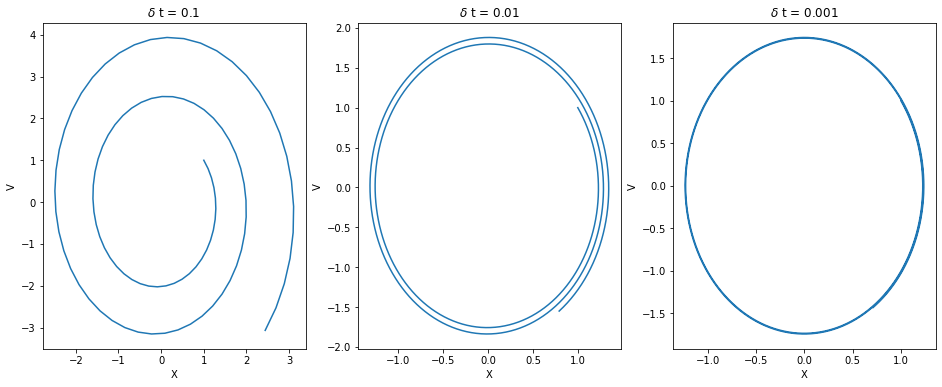

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(X,V):
    u = V
    v = -2*X
    return [u,v]

def euler(stapgrootte,periode):
    x = []
    y = []
    X = 1
    V = 1
    for i in range(0,periode):
        x.append(X)
        y.append(V)
        X += stapgrootte*verandering(x[-1],y[-1])[0]
        V += stapgrootte*verandering(x[-1],y[-1])[1]
    return x,y

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,6))

#subplot 1
x,y = euler(0.1,100)
ax1.plot(x,y)
ax1.title.set_text('$\delta$ t = 0.1')

#subplot 2

x,y = euler(0.01,1000)
ax2.plot(x,y)
ax2.title.set_text('$\delta$ t = 0.01')

#subplot 3
x,y = euler(0.001,10000)
ax3.plot(x,y)
ax3.title.set_text('$\delta$ t = 0.001')

#labels
ax1.set_xlabel('X')
ax1.set_ylabel('V')

ax2.set_xlabel('X')
ax2.set_ylabel('V')

ax3.set_xlabel('X')
ax3.set_ylabel('V')

plt.show()

Over de tijdsperiode van 100 seconden zien we bij een δt hoger dan 0.001 onstabiele spiralen (bewegen zich  richting de oorsprong), vanaf een δt van 0.001 of lager treden deze onstabiliteiten niet meer op. Het meest geschikte tijdsinterval is dus een δt van 0.001.

## De logistieke vergelijking

De logistieke vergelijking wordt gegeven door:
$$X' = 0.05X(1-\frac{X}{100})$$
Hier zijn 3 verschillende trajecten bekomen door 3 verschillende initiële condities:

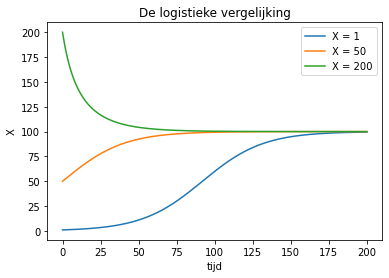

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(X):
    u = 0.05*X*(1-X/100)
    return u
def euler(X):
    x = []
    t = []
    stapgrootte = 0.01
    for i in range(0,20000):
        x.append(X)
        t.append(stapgrootte*i)
        X += stapgrootte*verandering(x[-1])
    return t,x

#conditie 1
t,x = euler(1)
plt.plot(t,x,label='X = 1')

#conditie 2
t,x = euler(50)
plt.plot(t,x,label='X = 50')

#conditie 3
t,x = euler(200)
plt.plot(t,x,label='X = 200')

plt.legend()
plt.title('De logistieke vergelijking')
plt.xlabel('tijd')
plt.ylabel('X')

plt.show()

Voor elke initiële X>0 wordt er geneigd naar X=100, bij lage waardes van X (bv X=1) is er een geleidelijke stijging maar bij hogere waardes bemerken we een snelle stijging.

## Epidemiën

### Het SIR model

Het SIR model ziet er als volgt uit:
$$S' = -\beta \frac{SI}{N}$$
$$I' = \beta \frac{SI}{N}-\gamma I$$
$$R' = \gamma I$$
Waar S het aantal mensen is dat ziek kan worden, I het aantal geïnfecteerden en R de mensen zijn die niet meer ziek kunnen worden (door dood of immuniteit). De constantes kunnen als volgt geïnterpreteerd worden: β is infectiepercentage, d.i hoeveel mensen 1 persoon infecteert per tijdseenheid als S ≈ N, en γ is de inverse van de tijd dat een persoon gemiddeld ziek is. Met deze twee constantes kunnen we het basisreproductienummer berekenen: 
$$R_0 = \frac{\beta}{\gamma} = 3.5$$
Dit is het aantal infecties die 1 persoon zal geven aan een volledig besmetbare populatie (aantal infecties die een persoon per tijdseenheid teweegbrengt vermenigvuldigd met de ziekteduratie).

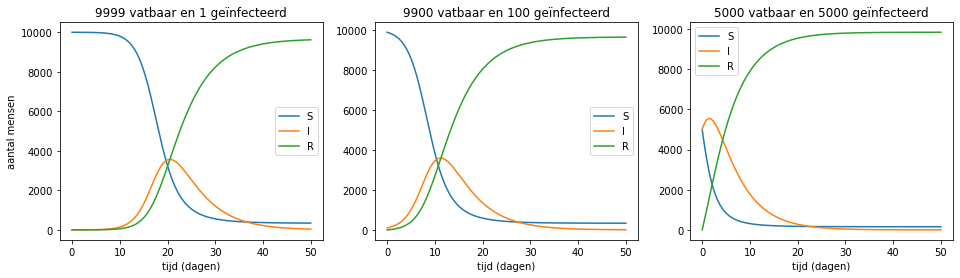

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(S,I):
    #constantes
    beta = 0.7  # in het begin hoeveel mensen geïnfecteerd raken per dag
    gamma = 0.2 #1 over de duur van de ziekte
    populatie = 10000
    
    #differentiaalvergelijkingen
    u = -1*beta*S*I/populatie
    v = beta*S*I/populatie - gamma*I
    w = gamma*I
    
    return [u,v,w]

def euler(stapgrootte,periode,s_init,i_init,r_init):
    tijd = []
    S = []
    I = []
    R = []
    S.append(s_init) #dit moet in deze volgorde anders werkt het niet
    I.append(i_init)
    R.append(r_init)
    tijd.append(0)
    for i in range(0,periode):
        tijd.append(stapgrootte*i)
        d = verandering(S[-1],I[-1])
        s = S[-1] + stapgrootte*d[0]
        i = I[-1] + stapgrootte*d[1]
        r = R[-1] + stapgrootte*d[2]
        S.append(s)
        I.append(i)
        R.append(r)
    return S,I,R,tijd
    

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(16,4))

#Versie 1
S,I,R,tijd = euler(0.01,5000,9999,1,0)
ax1.plot(tijd,S,label='S')
ax1.plot(tijd,I,label='I')
ax1.plot(tijd,R,label='R')
ax1.legend()
ax1.title.set_text('9999 vatbaar en 1 geïnfecteerd')

#Versie 2
S,I,R,tijd = euler(0.01,5000,9900,100,0)
ax2.plot(tijd,S,label='S')
ax2.plot(tijd,I,label='I')
ax2.plot(tijd,R,label='R')
ax2.legend()
ax2.title.set_text('9900 vatbaar en 100 geïnfecteerd')

#Versie 3
S,I,R,tijd = euler(0.01,5000,5000,5000,0)
ax3.plot(tijd,S,label='S')
ax3.plot(tijd,I,label='I')
ax3.plot(tijd,R,label='R')
ax3.legend()
ax3.title.set_text('5000 vatbaar en 5000 geïnfecteerd')

#labels
ax1.set_xlabel('tijd (dagen)')
ax1.set_ylabel('aantal mensen')

ax2.set_xlabel('tijd (dagen)')

ax3.set_xlabel('tijd (dagen)')

plt.show()

Nu zullen we nakijken wat het aantal mensen is die niet geïnfecteerd blijven na de epidemie in dit model:

In [4]:
S_1,I_1,R_1,tijd = euler(0.01,10000,9999,1,0)
S_100,I_100,R_100,tijd = euler(0.01,10000,9900,100,0)
S_5000,I_5000,R_5000,tijd = euler(0.01,5000,5000,5000,0)
print('Het aantal niet-geïnfecteerden na de eerste vorm van de epidemie (grafiek 1) bedraagt ' + 
      str(round(S_1[-1])) + ' mensen, na de tweede vorm van de epidemie (grafiek 2) ' + str(round(S_100[-1]))+ 
      ' mensen en na de derde vorm van de epidemie (grafiek 3) ' + str(round(S_5000[-1]))+ ' mensen.')

Het aantal niet-geïnfecteerden na de eerste vorm van de epidemie (grafiek 1) bedraagt 339 mensen, na de tweede vorm van de epidemie (grafiek 2) 335 mensen en na de derde vorm van de epidemie (grafiek 3) 159 mensen.


### Het SEIR model

Hier wordt er een parameter alfa geïntroduceert, dit is de inverse van de gemiddelde incubatietijd en zorgt voor een vorm van traagheid in het model. Er zal ook een ϱ geïntroduceerd worden als maatregelfactor (dit stelt o.a social distancing, mondmaskers en andere maatregels voor) met hoe kleiner ϱ hoe strenger de maatregels. We zouden ϱ kunnen opslorpen in β maar door deze factor te introduceren is er meer overzicht. Er wordt vertrokken uit een model waarbij 1 besmette persoon wordt geïntroduceert in een bevolking van 1,000,000 mensen.

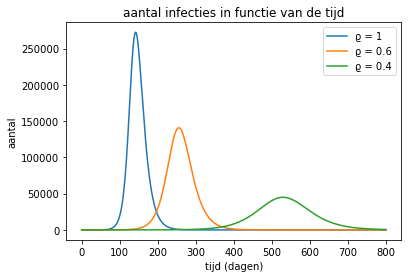

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(S,E,I,rho):
    #u -> S'
    #v -> E'
    #w -> I'
    #l -> R'
    #rho -> ϱ
    
    #constantes
    alfa = 0.2
    beta = 0.266
    gamma = 1/14
    populatie = 1000000
    
    #differentiaalvergelijkingen
    u = -rho*beta*S*I/populatie
    v = rho*beta*S*I/populatie - alfa*E
    w = alfa*E - gamma*I
    l = gamma*I
    
    return [u,v,w,l]

def euler(stapgrootte,periode,s_init,e_init,i_init,r_init,rho):
    tijd = []
    S = []
    E = []
    I = []
    R = []
    S.append(s_init)
    E.append(e_init)
    I.append(i_init)
    R.append(r_init)
    tijd.append(0)
    for i in range(0,periode):
        tijd.append(stapgrootte*i)
        d = verandering(S[-1],E[-1],I[-1],rho)
        s = S[-1] + stapgrootte*d[0]
        e = E[-1] + stapgrootte*d[1]
        i = I[-1] + stapgrootte*d[2]
        r = R[-1] + stapgrootte*d[3]
        S.append(s)
        E.append(e)
        I.append(i)
        R.append(r)
    return S,E,I,R,tijd


#conditie 1: rho = 1 (geen maatregelen)
S,E,I,R,tijd = euler(0.01,80000,999999,0,1,0,1)
plt.plot(tijd,I,label='ϱ = 1')

#conditie 2: rho = 0.6 (lichte maatregelen)
S,E,I,R,tijd = euler(0.01,80000,999999,0,1,0,0.6)
plt.plot(tijd,I,label='ϱ = 0.6')

#conditie 3: rho = 0.4 (harde maatregelen)
S,E,I,R,tijd = euler(0.01,80000,999999,0,1,0,0.4)
plt.plot(tijd,I,label='ϱ = 0.4')


plt.legend()
plt.title('aantal infecties in functie van de tijd')
plt.xlabel('tijd (dagen)')
plt.ylabel('aantal')
plt.show()

We zien dus dat het invoeren van maatregelen (ϱ verlagen) de curve verlaagt en verschuift naar rechts zodat het totaal aantal besmettingen op 1 bepaald moment een lagere piek vertoont dan moesten er geen maatregelen ingevoerd worden (blauwe curve). De mogelijke limitaties van dit model zijn dat mensen niet meer ziek kunnen worden na het virus gehad te hebben, uit recente studies blijkt dit echter niet het geval bij COVID-19 en kunnen mensen dus opnieuw besmet worden; mensen kunnen volgens dit model ook geen natuurlijke immuniteit vooraf vertonen of in quarantaine gaan. Ook is dit model gebouwd op directe overdracht van het ziek individu naar een niet-ziek individu waardoor niet-directe overdracht (besmet via bijvoorbeeld aangeraakte voorwerpen of geprepareerd voedsel) niet in acht wordt genomen.

### ϱ factor van België zoeken

Er zal nu getracht worden de waarde van ϱ te vinden voor België waarmee, moesten we deze zogezegd gehad hebben in het begin van februari, de capaciteit van de ziekenhuizen niet overschreden zouden worden. Dit dient puur als een soort 'proof of concept'/experiment en er zullen waarschijnlijk een hoop foute aannames gebeuren, o.a de beta van 0.266, alfa van 0.2 en de gamma van 1/14 die werden meegegeven uit de oefeningen, de vorig besproken tekortkomingen, etc.

Van het totaal aantal geïnfecteerde personen is er maar een klein percentage die opgenomen dient te worden op intensieve zorg. Per dag (raadpleging sciensano 3 oktober) worden gemiddeld 1.667 mensen besmet met corona waarvan 67 dienen gehospitaliseerd te worden, dit is 4% van de cases. Nu moet ongeveer 21% van de hospitalisaties op intensieve zorg (sciensano aantal in ICU gedeeld door het aantal hospitalisaties), en dus 0.8% van de cases.
Er zijn 2831 bedden voor intensieve zorg beschikbaar in België volgens een recent artikel van hln, de populatie van België telt momenteel 11,493,000 inwoners. Als we dus 0.8% van het aantal cases weergeven, geven we ongeveer het aantal intensieve zorg hospitalisaties weer:

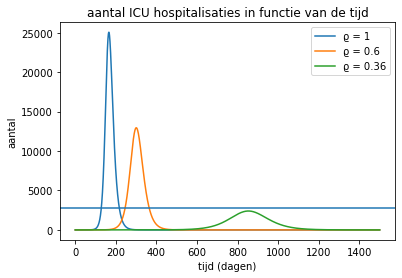

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(S,E,I,rho):
    #u -> S'
    #v -> E'
    #w -> I'
    #l -> R'
    #rho -> ϱ
    
    #constantes
    alfa = 0.2
    beta = 0.266
    gamma = 1/14
    populatie = 11493000
    
    #differentiaalvergelijkingen
    u = -rho*beta*S*I/populatie
    v = rho*beta*S*I/populatie - alfa*E
    w = alfa*E - gamma*I
    l = gamma*I
    
    return [u,v,w,l]

def euler(stapgrootte,periode,s_init,e_init,i_init,r_init,rho):
    tijd = []
    S = []
    E = []
    I = []
    R = []
    S.append(s_init)
    E.append(e_init)
    I.append(i_init)
    R.append(r_init)
    tijd.append(0)
    for i in range(0,periode):
        tijd.append(stapgrootte*i)
        d = verandering(S[-1],E[-1],I[-1],rho)
        s = S[-1] + stapgrootte*d[0]
        e = E[-1] + stapgrootte*d[1]
        i = I[-1] + stapgrootte*d[2]
        r = R[-1] + stapgrootte*d[3]
        S.append(s)
        E.append(e)
        I.append(i)
        R.append(r)
    return S,E,I,R,tijd


#conditie 1: rho = 1 (geen maatregelen)
S,E,I,R,tijd = euler(0.01,150000,11492999,0,1,0,1)
I = 0.008*np.array(I) #bij arrays kan je alle elementen tesamen vermenigvuldigen, niet met lists.
plt.plot(tijd,I,label='ϱ = 1')

#conditie 2: rho = 0.6 (lichte maatregelen)
S,E,I,R,tijd = euler(0.01,150000,11492999,0,1,0,0.6)
I = 0.008*np.array(I)
plt.plot(tijd,I,label='ϱ = 0.6')

#conditie 3: rho = 0.36 (voldoende maatregelen)
S,E,I,R,tijd = euler(0.01,150000,11492999,0,1,0,0.36)
I = 0.008*np.array(I)
plt.plot(tijd,I,label='ϱ = 0.36')


plt.legend()
plt.title('aantal ICU hospitalisaties in functie van de tijd')
plt.xlabel('tijd (dagen)')
plt.ylabel('aantal')
plt.axhline(y=2831)
plt.show()

We zouden hieruit dus kunnen besluiten dat een ϱ van ongeveer 0.35 de epidemie handelbaar zou houden.

#### Referenties

https://www.hln.be/wetenschap-planeet/medisch/nog-voldoende-capaciteit-maar-hoeveel-bedden-zijn-er-nu-echt-beschikbaar-op-intensieve-zorgen~ab3536fd/?referer=https%3A%2F%2Fwww.google.com%2F

https://epistat.wiv-isp.be/covid/covid-19.html